<a href="https://colab.research.google.com/github/ppijbb/Python_Notebook/blob/main/%ED%9A%8C%EA%B3%84%EB%B3%84%EC%84%B8%EC%B6%9C%EA%B2%B0%EC%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import matplotlib as mp
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

os.getcwd()

'/content'

In [ ]:
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*


mpl.rcParams['axes.unicode_minus'] = False
  # 그래프에서 마이너스 폰트 깨질 경우 대비
	
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.12.6-0ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype:

In [ ]:
print(os.listdir(os.getcwd()))

['.config', 'malgun.ttf', '회계별세출결산현황.xls', 'sample_data']


In [ ]:
obj = pd.read_excel('./회계별세출결산현황.xls')
print(obj.columns)
obj.drop(['회계연도'],axis ='columns', inplace=True) # drop([인덱스명])
obj.head()

Index(['회계연도', '소관명', '회계명', '계정명', '세출예산액(원)', '전년도이월액(원)', '예비비지출결정증액(원)',
       '예비비지출결정감액(원)', '전용증액(원)', '전용감액(원)', '이용및이체증액(원)', '이용및이체감액(원)',
       '초과지출승인액(원)', '세출예산현액(원)', '지출금액(원)', '다음년도이월액(원)', '불용액(원)'],
      dtype='object')


,소관명,회계명,계정명,세출예산액(원),전년도이월액(원),예비비지출결정증액(원),예비비지출결정감액(원),전용증액(원),전용감액(원),이용및이체증액(원),이용및이체감액(원),초과지출승인액(원),세출예산현액(원),지출금액(원),다음년도이월액(원),불용액(원)
0,가습기살균제사건과 4・16세월호참사 특별조사위원회,일반회계,NaN,0,0,11794323000,0,0,0,0,0,0,11794323000,6664376180,2152492290,2977454530
1,감사원,일반회계,NaN,129689781000,2633640100,0,0,108000000,-108000000,0,0,0,132323421100,124198771040,1353003960,6771646100
2,경찰청,경찰병원,손익계정,71664819000,0,0,0,202188000,-202188000,0,0,0,71664819000,67773332180,0,3891486820
3,경찰청,경찰병원,자본계정,5571000000,0,0,0,0,0,0,0,0,5571000000,5126452040,0,444547960
4,경찰청,일반회계,NaN,10500637559000,16787790340,9457000000,0,21996529000,-21996529000,0,0,0,10526882349340,10232804465010,17046947520,277030936810


In [ ]:
obj.sort_values(by='지출금액(원)',ascending=False,inplace= True)
obj2 = obj.head(5)
obj2.set_index("소관명",inplace = True)
obj2.head()

,회계명,계정명,세출예산액(원),전년도이월액(원),예비비지출결정증액(원),예비비지출결정감액(원),전용증액(원),전용감액(원),이용및이체증액(원),이용및이체감액(원),초과지출승인액(원),세출예산현액(원),지출금액(원),다음년도이월액(원),불용액(원)
소관명,,,,,,,,,,,,,,,
교육부,일반회계,NaN,64027248485000,13024052650,33816000000,0,466308777000,-466308777000,1756881000,-1756881000,10314527000,64084403064650,63970107713790,4828484220,109466866640
행정안전부,일반회계,NaN,48211854778000,16135463950,174738547000,0,20113330000,-20113330000,9155611000,-7413611000,972000000,48405442788950,48226444342400,118433520690,60564925860
보건복지부,일반회계,NaN,37609146695000,21726713670,415979000000,0,178594765000,-178594765000,11666906000,-11666906000,0,38046852408670,37953467752850,34141087640,59243568180
국방부,일반회계,NaN,29637827477000,510323984170,2146652000,0,173195756800,-173195756800,43776328000,-43776328000,0,30150298113170,29220828619360,492165286860,437304206950
국토교통부,일반회계,NaN,20698924452000,41885227680,75885000000,0,54870467000,-54870467000,15659309000,-159414693340,43268000,20672982563340,20574043421630,46263183490,52675958220


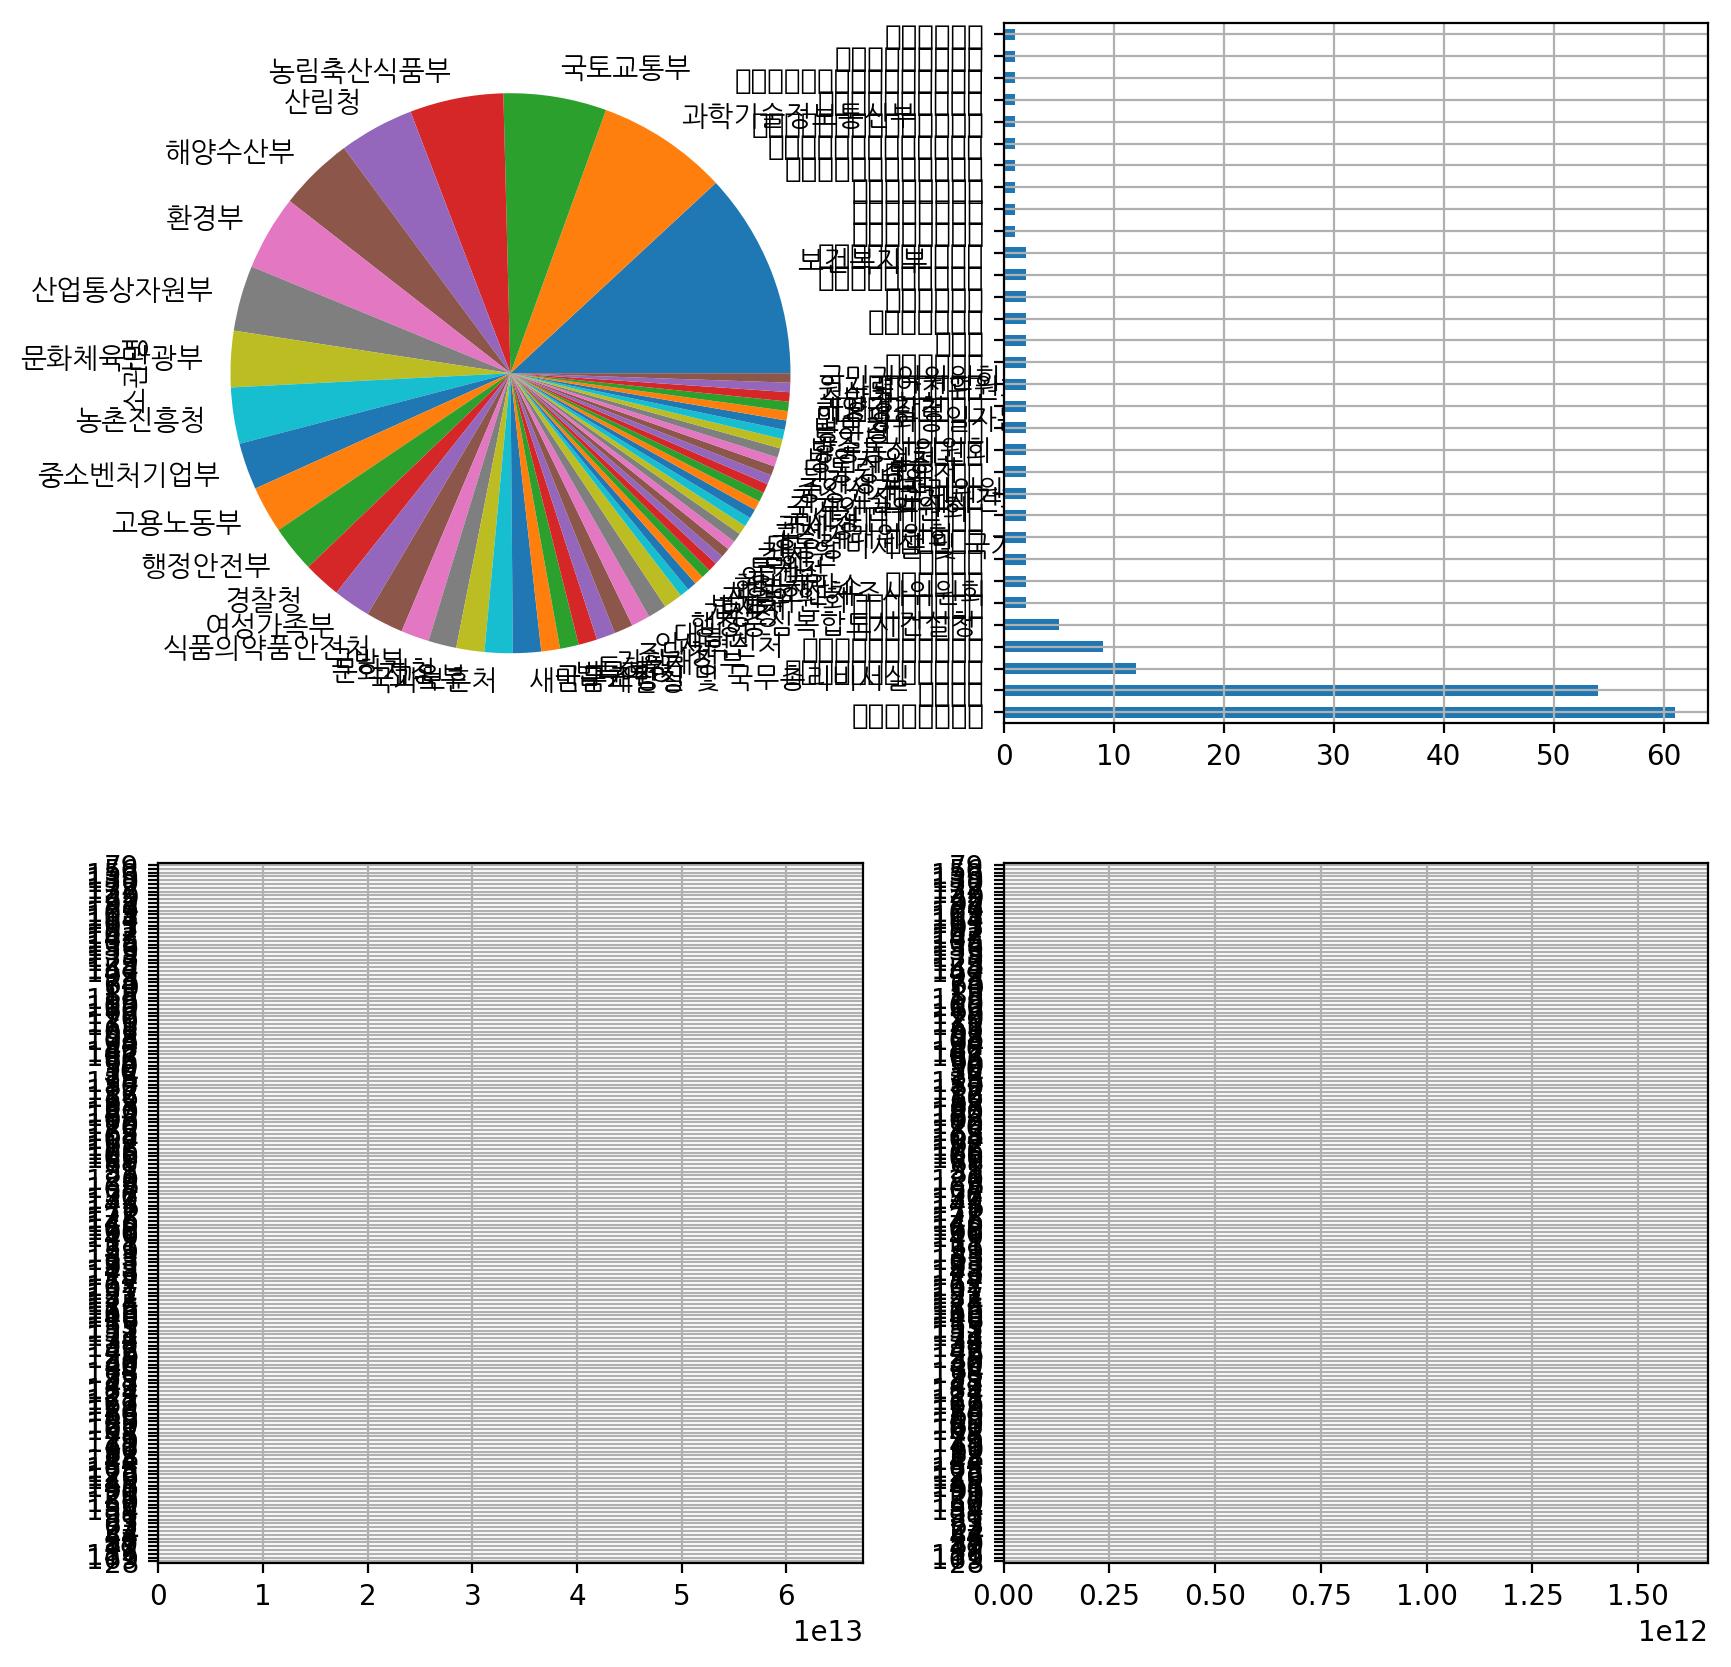

In [ ]:
plt.subplot(221) # 2행2열의 서브 플롯 중 첫번째 위치.
obj['소관명'].value_counts().plot.pie(figsize=(10,10))
plt.style.use('default')
plt.subplot(222) # 2행2열의 서브 플롯 중 두번째 위치.
obj['회계명'].value_counts().plot(kind='barh', grid=True)# bar horizontal 
plt.subplot(223) # 2행2열의 서브 플롯 중 두번째 위치.
plt.axis('auto')
obj['세출예산현액(원)'].plot(kind='barh', grid=True )# bar horizontal 
plt.subplot(224) # 2행2열의 서브 플롯 중 두번째 위치.
obj['불용액(원)'].plot(kind='barh', grid=True )# bar horizontal 

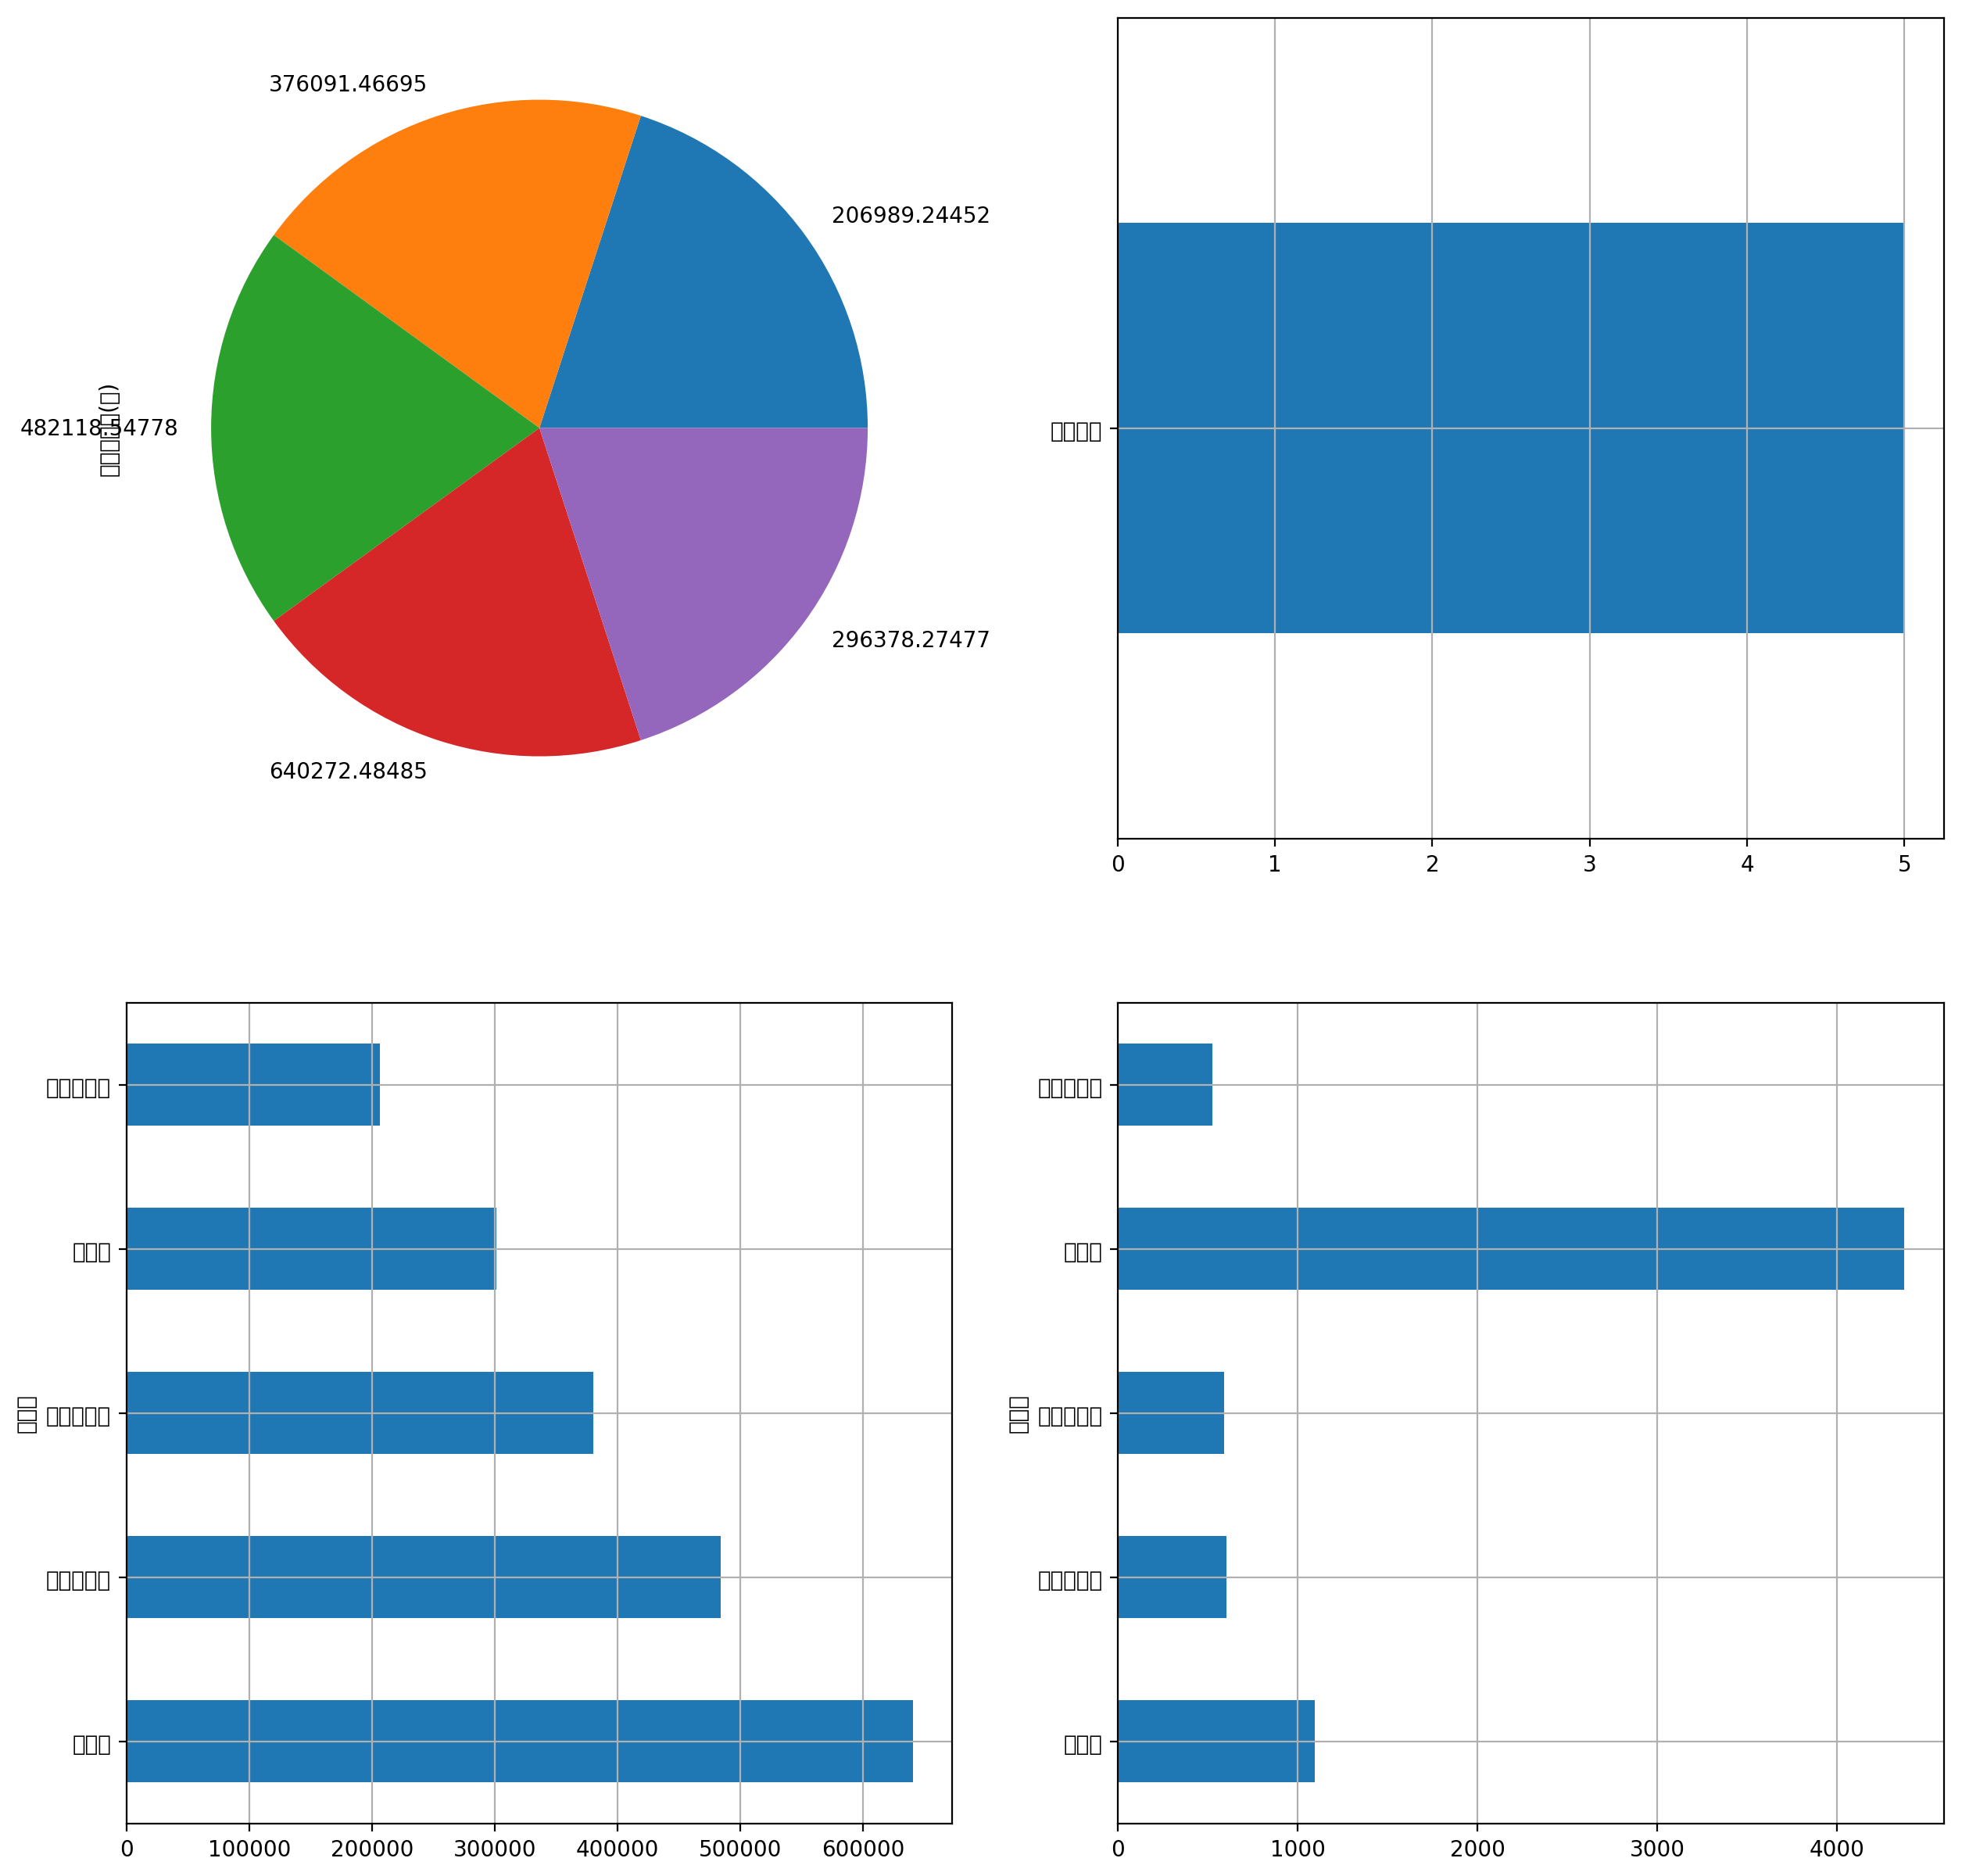

In [ ]:
plt.subplot(221) # 2행2열의 서브 플롯 중 첫번째 위치.
(obj2['세출예산액(원)']/(10**8)).value_counts().plot.pie(figsize=(15,15))
plt.style.use('default')
plt.subplot(222) # 2행2열의 서브 플롯 중 두번째 위치.
obj2['회계명'].value_counts().plot(kind='barh', grid=True )# bar horizontal 
plt.subplot(223) # 2행2열의 서브 플롯 중 두번째 위치.
(obj2['세출예산현액(원)']/(10**8)).plot(kind='barh', grid=True )# bar horizontal 
plt.subplot(224) # 2행2열의 서브 플롯 중 두번째 위치.
(obj2['불용액(원)']/(10**8)).plot(kind='barh', grid=True )# bar horizontal 